### This notebook includes scripts for cleaning the 2018 Tariff data set which includes information on the Harmonized System Codes

### Harmonized number pertains to the commodity code in a schedule B document. Harmonized value is total price in dollars and harmonized weight is total weight of the commodity this is useful information for tax purposes

### I also conducted some data transformation when it comes to the weight values by creating a function that converts a column all into kilograms.

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
import numpy as np

In [2]:
# creating a log changes file 
log_file_path = 'C:/Users/Public/project_1/log_file.txt'

# take the current time stamp
now = pd.Timestamp.now()

def log_changes(message):
    """ 
    Function to save a "message" regarding the changes made to the data frames
    with a timestamp of the time it was made.
    """
    
    with open(log_file_path, 'a') as f:
        message = now.strftime('%Y-%m-%d %H:%M:%S') +': ' + message + ' on the Tariff Table \n'
        f.write(message)
		

In [ ]:
# saving the CSV's filepath
file_path_tariff_0 = 'C:/Users/Public/project_1/bronze/tariff/ams__tariff_2018__202001290000_part_0.csv'
file_path_tariff_1 = 'C:/Users/Public/project_1/bronze/tariff/ams__tariff_2018__202001290000_part_1.csv'

# reading the file paths in 
tariff_0 = pd.read_csv(file_path_tariff_0)
tariff_1 = pd.read_csv(file_path_tariff_1)

# creating a single data frame 
tariff_2018 = pd.concat([tariff_0, tariff_1], axis=0)


In [11]:
# taking a closer look at my data frame 
tariff_2018.info()
tariff_2018.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16118492 entries, 0 to 6118491
Data columns (total 7 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   identifier                   int64  
 1   container_number             object 
 2   description_sequence_number  int64  
 3   harmonized_number            object 
 4   harmonized_value             float64
 5   harmonized_weight            int64  
 6   harmonized_weight_unit       object 
dtypes: float64(1), int64(3), object(3)
memory usage: 983.8+ MB


,identifier,container_number,description_sequence_number,harmonized_number,harmonized_value,harmonized_weight,harmonized_weight_unit
0,2018010128,TGHU0209174,1,36.0,3280.0,16430,Kilograms
1,2018010169,SUDU8579238,1,8479.0,NaN,5254,Kilograms
2,2018010170,SUDU8784361,1,93.0,2170.0,10880,Kilograms
3,20180101111,NC,1,8320.0,2.0,1300,Kilograms
4,20180101112,NC,1,8320.0,420.0,2130,Kilograms


In [13]:
# getting count of the null values 
tariff_2018.isnull().sum()

identifier                           0
container_number                     0
description_sequence_number          0
harmonized_number              1128256
harmonized_value                383406
harmonized_weight                    0
harmonized_weight_unit         5965020
dtype: int64

In [14]:
# checking specific values for the weight unit
tariff_2018['harmonized_weight_unit'].unique()

array(['Kilograms', 'Pounds', nan, 'Measurement Ton', 'Short Ton',
       'Metric Ton', 'Long Ton'], dtype=object)

In [4]:
# seeing how many values each measurement unit carries
tariff_2018['harmonized_weight_unit'].value_counts()

Kilograms          9517491
Pounds              634604
Short Ton              863
Measurement Ton        504
Long Ton                 6
Metric Ton               4
Name: harmonized_weight_unit, dtype: int64

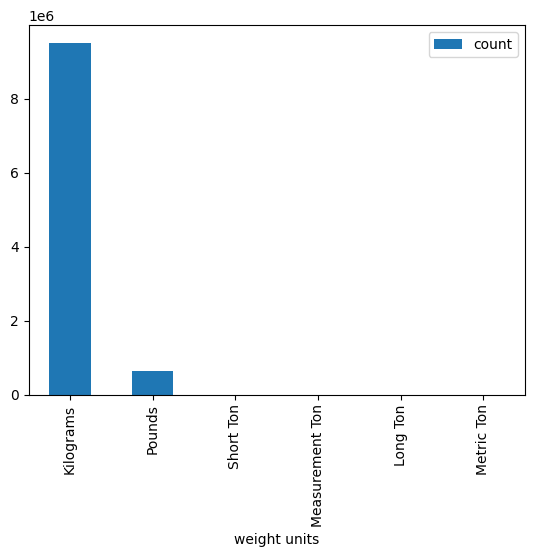

In [16]:
# A visual representation to display that most of the commodities are in kilograms
# which is a deciding factor to convert into KG

df = pd.DataFrame({
    'weight units': ['Kilograms','Pounds', 'Short Ton',  'Measurement Ton', 'Long Ton', 'Metric Ton' ],
    'count': [9517323, 634594, 863, 504, 6, 4]
})
  
# plotting a bar graph
df.plot(x="weight units", y="count", kind="bar")
plt.show()

In [4]:
# creating a function that will convert each row to kilograms
def to_kilograms (original_weight_unit, original_weight):
    """
    A function to convert each value in weight_unit column to kilograms
    """

    if original_weight_unit == 'Kilograms':
        return original_weight*1
    elif original_weight_unit == 'Pounds':
        return original_weight*0.453592
    elif original_weight_unit == 'Metric Ton':
        return original_weight*1000
    elif original_weight_unit == 'Long Ton':
        return original_weight*1016.05
    elif original_weight_unit == 'Short Ton':
        return original_weight*907.185
    else: 
        return original_weight

In [5]:
# Applying the to_kilograms function
tariff_2018['harmonized_weight_kg'] = tariff_2018.apply(lambda row: to_kilograms(row['harmonized_weight_unit'], 
                                                        row['harmonized_weight']), axis=1)

# rounding the values
tariff_2018['harmonized_weight_kg'] = round(tariff_2018['harmonized_weight_kg'])

# saving the changes
log_changes('creating a kg column')

,identifier,container_number,description_sequence_number,harmonized_number,harmonized_value,harmonized_weight,harmonized_weight_unit,harmonized_weight_kg
0,2018010128,TGHU0209174,1,36.0,3280.0,16430,Kilograms,16430.0
1,2018010169,SUDU8579238,1,8479.0,NaN,5254,Kilograms,5254.0
2,2018010170,SUDU8784361,1,93.0,2170.0,10880,Kilograms,10880.0
3,20180101111,NC,1,8320.0,2.0,1300,Kilograms,1300.0
4,20180101112,NC,1,8320.0,420.0,2130,Kilograms,2130.0


In [ ]:
# looking at all the values for measurment ton
tariff_2018[tariff_2018['harmonized_weight_unit']== 'Measurement Ton']


### Decided to drop  measurement ton since there are mainly null values within the harmonized number field. The measurment of unit could be an indicator of a mistake  Since measurement ton is not an appropriate unit of weight.I wouldn't want to touch it until I got clarity of what it represents hence dropping it

In [19]:
# dropping the rows corresponding to measurement ton
measurment_ton_index = tariff_2018[tariff_2018['harmonized_weight_unit'] == 'Measurement Ton'].index
tariff_2018.drop(measurment_ton_index, inplace = True)

# saving the changes
log_changes('Dropping values that have measurment ton')

In [26]:
# drop the null values 
log_changes('Dropping null values')
tariff_2018.dropna(inplace = True)

In [27]:
# checking status of null values after recent changes
tariff_2018.isnull().sum()



identifier                     0
container_number               0
description_sequence_number    0
harmonized_number              0
harmonized_value               0
harmonized_weight              0
harmonized_weight_unit         0
harmonized_weight_kg           0
dtype: int64

In [29]:
# dropping duplicates for identifier 
# duplicates can complicate my queries when using it as a primary index
tariff_2018.drop_duplicates(subset=['identifier'], inplace= True)


log_changes('dropping duplicates')

In [35]:
# checking the counts for container number
tariff_2018['container_number'].value_counts()

NC             47638
NC NC1          4870
INBULK1         2413
MEDU8047692      279
YMMU4024266      277
               ...  
SUDU1793103        1
FESU5109600        1
TCNU6239446        1
HASU4543609        1
TRLU6909278        1
Name: container_number, Length: 1927711, dtype: int64

In [36]:
# dropping NC container value duplicates 
NC_index = tariff_2018[tariff_2018['container_number']== 'NC'].index
tariff_2018.drop(NC_index[1:], inplace= True)


log_changes('Dropping duplicates from the container number column')

In [37]:
# dropping NC1 container duplicates 
NC1_index = tariff_2018[tariff_2018['container_number']== 'NC NC1'].index
tariff_2018.drop(NC1_index[1:], inplace= True)
log_changes('Dropping duplicates from the container number column')

In [ ]:
# checking values for loose cargo
tariff_2018[tariff_2018['container_number'] == 'LOOSE CARGO']

In [39]:
# Droping duplicates since loose cargo refers to commodities not in containers 
loose_index = tariff_2018[tariff_2018['container_number']== 'LOOSE CARGO'].index
tariff_2018.drop(loose_index[1:], inplace= True)
log_changes('Dropping duplicates from the container number column')

In [33]:
# exporting cleaned dataframe and logging it 
tariff_2018.to_csv('tariff__cleaned.csv', index= False, sep= '|')

log_changes('exporting the data to load to sql')